In [1]:
import numpy as np
import cv2
from scipy import misc
import matplotlib.pyplot as plt

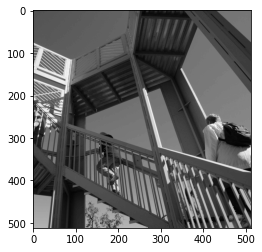

In [2]:
i=misc.ascent() 

plt.grid(False)
plt.gray()
plt.imshow(i)

In [10]:
f1=np.array([[-2,-4,-4],[0,0,0],[2,4,2]]) #horizontal
f2=np.array([[-2,0,2],[-4,0,4],[-2,0,2]]) #vertical
f3=np.array([[0,4,2],[-4,0,4],[-2,-4,0]]) #diagonal
fil=f2

In [11]:
i_transformed=np.copy(i)
size_x,size_y=i_transformed.shape

In [12]:
for i1 in range(1,size_x-1):
  for j1 in range(1,size_y-1):
    tempconv=0.0
    tempconv=tempconv+i[i1-1][j1-1]*fil[0][0]
    tempconv=tempconv+i[i1-1][j1]*fil[0][1]
    tempconv=tempconv+i[i1-1][j1+1]*fil[0][2]
    tempconv=tempconv+i[i1][j1-1]*fil[1][0]
    tempconv=tempconv+i[i1][j1]*fil[1][1]
    tempconv=tempconv+i[i1][j1+1]*fil[1][2]
    tempconv=tempconv+i[i1+1][j1-1]*fil[2][0]
    tempconv=tempconv+i[i1+1][j1]*fil[2][1]
    tempconv=tempconv+i[i1+1][j1+1]*fil[2][2]
    tempconv=tempconv/9
    if(tempconv>255):
      tempconv=255
    if(tempconv<0):
      tempconv=0
    i_transformed[i1][j1]=tempconv

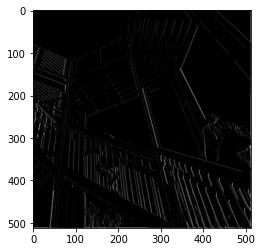

In [13]:
plt.grid(False)
plt.gray()
plt.imshow(i_transformed)

In [14]:
i_pooled=np.zeros((int(size_x/2),int(size_y/2)))

In [15]:
for x in range(0,size_x,2):
  for y in range(0,size_y,2):
    temp=[]
    temp.append(i_transformed[x][y])
    temp.append(i_transformed[x+1][y])
    temp.append(i_transformed[x][y+1])
    temp.append(i_transformed[x+1][y+1])
    i_pooled[int(x/2)][int(y/2)]=np.max(temp)

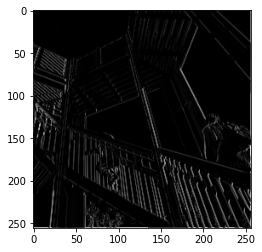

In [16]:
plt.grid(False)
plt.gray()
plt.imshow(i_pooled)